### Introduction

Suppose we have a bunch of URLs and we want to know their adult-rating
(i.e., is the url P, or G, or X, or R). This task is difficult for
computers, but easy for humans, and this has led to the growth of
crowdsourcing: get a bunch of humans to give ratings to urls, but
use automated techniques to figure out how much to trust each person's
ratings.

We are going to use the data from a paper by Ipeirotis *et al.*
This details an experiment run on Amazon's *Mechanical Turk* crowdsourcing system.
They ask a bunch of raters (called "turks") to rate several urls,
but they already know the answers (the true categories) for a few
urls, called the **gold set**. The ratings of the turks on the gold
set thus allows us to judge their accuracy.

### [Q1 10 points] Read in data}
Read in the files **gold.txt** and **labels.txt**.  The **gold**
DataFrame should have columns `url` and `category`, while the
**labels** DataFrame should have columns `turk`, `url` and
`category`. You will have to pick the right separator.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
gold_data = pd.read_csv("gold.txt", sep='\t', names=["url", "category"])
label_data = pd.read_csv("labels.txt", sep='\t', names=["turk", "url", "category"])
print("gold DataFrame:")
print(gold_data.head())

print("\nlabels DataFrame:")
print(label_data.head())


gold DataFrame:
                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X

labels DataFrame:
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


### [Q2 10 points] Split into two DataFrames
Split the **labels** DataFrame into two:
* **labels_on_gold**, containing all rows where the url is present in the gold set, and
* **labels_unknown**, containing all the remaining rows of **labels**.

In [3]:
labels_gold = label_data[label_data['url'].isin(gold_data['url'])]
labels_unknown = label_data[~label_data['url'].isin(gold_data['url'])]

print("labels_on_gold DataFrame:")
print(labels_gold.head())

print("\nlabels_unknown DataFrame:")
print(labels_unknown.head())


labels_on_gold DataFrame:
               turk                        url category
245  A1253FXHCZ9CWM  http://0800-horoscope.com        G
246  A153PKAL7OAY36  http://0800-horoscope.com        G
247  A1FV9SAPL5C6KY  http://0800-horoscope.com        G
248  A1JTOT0DWM6QGL  http://0800-horoscope.com        G
249  A1PXXEOGQ76RNJ  http://0800-horoscope.com        G

labels_unknown DataFrame:
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


### [Q3 10 points] Compute accuracies of turks
Create a **rater_goodness** DataFrame that is indexed by turk, and
has two columns: the number of ratings, and the average correctness of
ratings for each turk (both on gold set urls).

In [4]:
temp_df = labels_gold.merge(gold_data, on='url', suffixes=['_turk', '_gold'])
temp_df['flag'] = temp_df.apply(lambda row: 1 if row['category_turk'] == row['category_gold'] else 0, axis=1)
temp_df2 = temp_df.groupby(['turk'])['flag'].agg(['count', 'mean']).reset_index()
temp_df2['count'].sum()



3324

In [5]:
rater_goodness = temp_df2.rename(columns={'count': 'number_of_ratings', 'mean': 'avg_correctness'}).set_index('turk')
rater_goodness['odds'] = rater_goodness['avg_correctness'].apply(lambda x: x / (1.001 - x))
rater_goodness

,number_of_ratings,avg_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


### [Q4 10 points] Odds ratios}
If someone is correct $p$ fraction of the time, the `odds` of
success are defined as:

$$\mbox{odds} = \frac{p}{1.001-p}.$$

Attach a column called `odds` to the **rater_goodness** DataFrame, using the average correctness of the turk as his or her $p$.

In [6]:

rater_goodness['odds'] = rater_goodness['avg_correctness'].apply(lambda x: x / (1.001 - x))
rater_goodness


,number_of_ratings,avg_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


### [Q5 10 points] Most accurate turks
List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [7]:
top_turks = rater_goodness[rater_goodness['number_of_ratings'] >= 20].sort_values(by='avg_correctness', ascending=False)[
            :10]

print("Top 10 Most Accurate Turks with at least 20 gold set URLs:")
print(top_turks)


Top 10 Most Accurate Turks with at least 20 gold set URLs:
                number_of_ratings  avg_correctness       odds
turk                                                         
A2U0R4X38GUKZE                 20         0.950000  18.627451
A22C0PJUBFJTI0                 36         0.916667  10.869565
A23YQUBXZPKILZ                 24         0.875000   6.944444
ATVALOQVDCMZW                 103         0.854369   5.826657
A1HIXWH4OXT8S4                 40         0.825000   4.687500
A3220HG1O83HQ4                 22         0.818182   4.475385
A32W20KGQXS0LL                 25         0.800000   3.980100
A20PWAB7G3HDHU                 20         0.800000   3.980100
AJSJVK40F5HM6                  28         0.785714   3.649635
A31OCN4MNHUQ6W                184         0.777174   3.472222


### [Q6 10 points] Rating counts versus accuracy
One may imagine that a committed and accurate turk will rate lots of
URLs. On the other hand, perhaps it is only the spammers who have the
time to rate lots of URLs.

Is number of ratings by a turker on gold set URLs related to his or
her accuracy? There's no fixed answer; just try to show some evidence
for your answer.

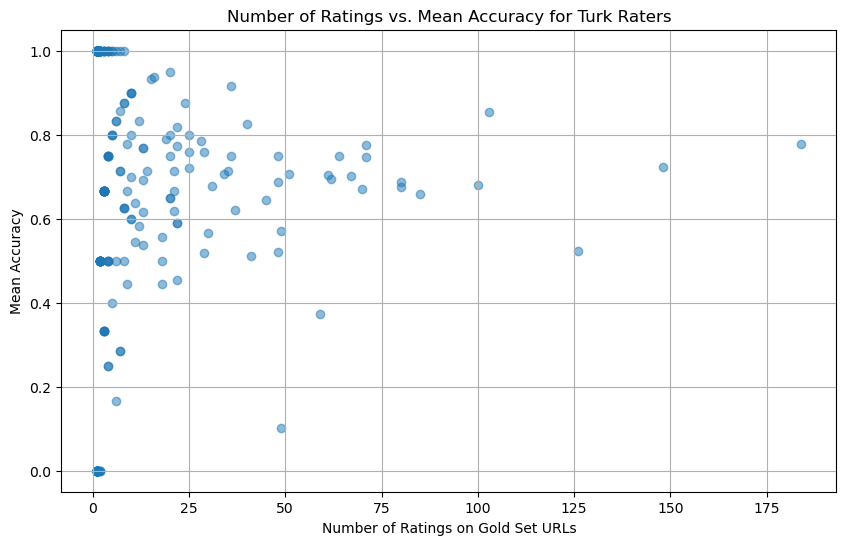

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(rater_goodness['number_of_ratings'], rater_goodness['avg_correctness'], alpha=0.5)
plt.xlabel('Number of Ratings on Gold Set URLs')
plt.ylabel('Mean Accuracy')
plt.title('Number of Ratings vs. Mean Accuracy for Turk Raters')
plt.grid(True)
plt.show()

In [9]:
correlation = rater_goodness['number_of_ratings'].corr(rater_goodness['avg_correctness'])
print("Correlation between Number of Ratings and Mean Accuracy:", correlation)


Correlation between Number of Ratings and Mean Accuracy: 0.04529238280484696


1. The scatter plot shows no clear linear relationship between the number of ratings and mean accuracy of Turk raters.
2. There is no consistent trend of accuracy decreasing or increasing with an increase in the number of ratings.
3. The Pearson correlation coefficient of approximately 0.04 indicates little to no linear correlation between the variables.
4. The accuracy of turks with fewer ratings does not appear to be significantly higher than those with more ratings.

### [Q7 13 points] Overall predicted odds}

Let $u$ denote any url $u$ that is *not* in the gold set, and let $c$ denote some category. 

* For every valid pair $(u, c)$, calculate the product of odds of all turks who satisfy the following two conditions: 
    1. the turk rated url $u$ as category $c$, and 
    2. he/she rated more gold set urls than 75% of all turks who rated at least one gold-set url.

For example, if you find that there are 269 turks who rated at least
one gold-set url, you want to select only the turks who have rated
more gold-set urls than 75% of these 269 turks. We can think of
these as our *"reliable"* turks. Now, our belief that url $u$ belongs
to category $c$ depends on how many reliable turks rated $u$ as $c$;
specifically, our belief is based on the product of their reliability
scores (i.e., their odds).

We shall call such products of odds the **overall odds** henceforth.

In [10]:
top_turks_75 = rater_goodness[rater_goodness['number_of_ratings'] > rater_goodness['number_of_ratings'].quantile(0.75)]
top_turks_25 = rater_goodness[rater_goodness['number_of_ratings'] > rater_goodness['number_of_ratings'].quantile(0.25)]
top_turks_75




,number_of_ratings,avg_correctness,odds
turk,,,
A1253FXHCZ9CWM,29,0.517241,1.069214
A12RE8G66WTO8B,20,0.750000,2.988048
A153PKAL7OAY36,148,0.722973,2.600369
A18HIFA78GUAG9,13,0.538462,1.164144
A1DCIXV1JC91MY,22,0.590909,1.440922
...,...,...,...
AV30XWLULCP43,13,0.615385,1.595851
AVWJPWUEE3U4Q,36,0.750000,2.988048
AZ1S5BIG5R6P6,35,0.714286,2.491281


In [11]:
temp_df = pd.merge(labels_unknown, top_turks_75,  how='inner', left_on=['turk'], right_on=[top_turks_75.index])
temp_df

,turk,url,category,number_of_ratings,avg_correctness,odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
1,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
2,A1PXXEOGQ76RNJ,http://0000.jp,G,41,0.512195,1.047852
3,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
4,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
...,...,...,...,...,...,...
40616,amurray,http://www.blazzpage.7p.com/,G,15,0.933333,13.793103
40617,amurray,http://www.byroncrawford.com/,P,15,0.933333,13.793103
40618,amurray,http://www.freelayouticons.com/,P,15,0.933333,13.793103
40619,amurray,http://www.hollywoodtuna.com/?p=4729,R,15,0.933333,13.793103


In [12]:
overall_odds_75 = temp_df.groupby(['url', 'category']).agg({'odds': 'prod'}).reset_index()
overall_odds_75.rename(columns={'odds': 'overall_odds'}, inplace=True)
overall_odds = overall_odds_75.sort_values(by = ['url','overall_odds'], ascending = [True, False])



### [Q8 13 points] Predicted categories
Create a DataFrame called **result_75**, with the following characteristics:
* its index is URLs not in the gold set,
* it has two columns:
    * `top category`: the category with the highest overall odds for that url, and
    * `top odds`: the overall odds for that top category.

These are our predictions, and the confidence we have in them (higher
overall odds implies greater confidence). If you want, you can
check to see if the predicted categories make sense.

In [13]:
result_75 = overall_odds.groupby('url').first()

result_75.rename(columns={'category': 'top_category_75', 'overall_odds': 'top_odds_75'}, inplace=True)

print("DataFrame with Top Category and Odds for each URL (75th percentile turks):")
print(result_75)


DataFrame with Top Category and Odds for each URL (75th percentile turks):
                            top_category_75  top_odds_75
url                                                     
http://0-101.net                          G     2.155963
http://000.cc                             G     1.460583
http://0000.jp                            G    14.488244
http://000relationships.com               G     5.681060
http://000vitamins.com                    G     3.784982
...                                     ...          ...
http://zwinky.com                         G    16.141443
http://zylom.com                          G     1.735526
http://zynga.com                          G     3.704611
http://zz868.com                          P     1.851852
http://zzx.cc                             X     1.620746

[10610 rows x 2 columns]


In [14]:
print(result_75.loc['http://fisherbikes.com'])

top_category_75               G
top_odds_75        59084.832547
Name: http://fisherbikes.com, dtype: object


### [Q9 14 points] Predicted categories using more turks
Questions 7 and 8 above only considered the ratings of turks who had
rated enough gold set URLs, so we were relatively more confident about
their accuracies. What happens if we loosen this restriction?

Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings).
Call this **result_25**.

Now let's see how these two results compare. 
Create a DataFrame where both the index and the columns are the
various categories, and the cells contain the number of urls with
these as the top categories according to **result_75** and **result_25**.

For example, the cell corresponding to the row `category=R`
and the column `category=G` would be the number of URLs that were predicted to
be *R* by **result_75** but predicted to be *G* by **result_25**.

Where are the most errors?

In [15]:
temp_df = pd.merge(labels_unknown, top_turks_25,  how='inner', left_on=['turk'], right_on = [top_turks_25.index])
temp_df



,turk,url,category,number_of_ratings,avg_correctness,odds
0,A1OT3A29R9N1DG,http://000.cc,P,8,0.500000,0.998004
1,A1OT3A29R9N1DG,http://1centemails.com,G,8,0.500000,0.998004
2,A1OT3A29R9N1DG,http://24hfx.com,P,8,0.500000,0.998004
3,A1OT3A29R9N1DG,http://265e.com,P,8,0.500000,0.998004
4,A1OT3A29R9N1DG,http://30gh.com,G,8,0.500000,0.998004
...,...,...,...,...,...,...
66205,AMD9GAZO9NECR,http://filife.com,G,2,0.500000,0.998004
66206,AMD9GAZO9NECR,http://filthdump.com,X,2,0.500000,0.998004
66207,A204NDFTMBY7KJ,http://free4m.tripod.com/,R,4,1.000000,1000.000000
66208,A2MC38IV7L231H,http://realsocialdynamics.com,P,3,0.333333,0.499251


In [16]:
overall_odds_25 = temp_df.groupby(['url','category']).agg({'odds':'prod'}).reset_index()
overall_odds_25.rename(columns={'odds': 'overall_odds'}, inplace=True)
#this is to get the top category and odds for each url
overall_odds_25 = overall_odds_25.sort_values(by = ['url','overall_odds'], ascending = [True, False])

result_25 = overall_odds_25.groupby('url').first()
result_25.rename(columns={'category': 'top_category_25', 'overall_odds': 'top_odds_25'}, inplace=True)
result_25


,top_category_25,top_odds_25
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,2.873345e+03
http://zynga.com,G,5.442125e+01


In [17]:
result_75_reset = result_75.reset_index(drop=True)
result_25_reset = result_25.reset_index(drop=True)

In [18]:
combined = pd.merge(result_75, result_25, how='inner', left_on=[result_75.index], right_on = [result_25.index])
combined

,key_0,top_category_75,top_odds_75,top_category_25,top_odds_25
0,http://0-101.net,G,2.155963,G,2.155963e+00
1,http://000.cc,G,1.460583,G,2.181050e+03
2,http://0000.jp,G,14.488244,G,2.877556e+07
3,http://000relationships.com,G,5.681060,P,1.851852e+00
4,http://000vitamins.com,G,3.784982,G,5.014149e+00
...,...,...,...,...,...
10605,http://zwinky.com,G,16.141443,P,1.000000e+03
10606,http://zylom.com,G,1.735526,G,2.873345e+03
10607,http://zynga.com,G,3.704611,G,5.442125e+01
10608,http://zz868.com,P,1.851852,G,1.209566e+13


In [19]:
comparison = pd.crosstab(combined['top_category_25'], combined['top_category_75'])
comparison

top_category_75,G,P,R,X
top_category_25,,,,
G,8327,189,21,27
P,574,328,34,6
R,186,47,128,26
X,216,19,25,457


The figures along the diagonal represent the correct predictions, and the off-diagonal elements represent the errors in predictions. The maximum error is observed in cases where turks above the 25th percentile predict category P, but turks above the 75th percentile predict category G. This highlights a significant disagreement in their categorization for such URLs. Conversely, the minimum error is seen in situations where both greater than 25th percentile and greater than 75th percentile turks agree on category P and X ratings, respectively. This suggests a higher level of consensus and accuracy among turks in predicting these categories. 